In [103]:
# ! pip install unidecode

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> State & Refine QS</h1></div>

#### What is the most paying position in Berlin?

> #### _`QS:`_
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>|ai engineers and software engineers with high Seniority level have a high salaries.|<ul><li>Filter the data to get positions in Berlin only</li><li>Get the average Salary For each position in senior level only and sort them</li><li>plot the average for each position in Berlin</li><li>look at the top 5 positions if they contain Machine Learning</li></ul>|_`Matches`_ |
>|The juniors distribution for the average salaries may be different from the seniors and Middle as in IT Positions , some positions not commmon to need juniors such as Machine learning ,for example compared to frontend developer or software developer in general  |Same data collection but we look in junior seniority level |_`Matches`_ |


In [104]:
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from E_Salary_Cities import *

In [105]:
df_2020,df_2019,df_2018=read()
# print(df_2020['Company size'].unique())
# print(df_2019['Company size'].unique())
rename_columns(df_2020,df_2019,df_2018)
df_2018['Position'].value_counts()
df_merged=merge([df_2020,df_2019,df_2018],common_columns=['Position','Salary','City','Seniority level'])

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Explore Data</h1></div>

#### Analysis for each column

In [106]:
############################### CITY ANALYSIS #################################

-  `Expectations : 1. Berlin will have the biggest % as it is capital of Germany`

In [107]:
# Clean the columns 
# check nulls 
pos_nan = count_nan_values(df_merged,'Position')
city_nan = count_nan_values(df_merged,'City')
sal_nan = count_nan_values(df_merged,'Salary')
seniority_nan = count_nan_values(df_merged,'Seniority level')
print(df_merged['Seniority level'].unique())

['Senior' 'Lead' 'Junior' 'Middle' 'Head' nan 'No level' 'VP' 'Manager'
 'Work Center Manager' 'CTO' 'No level ' 'Director' 'Key'
 'C-level executive manager' 'Principal' 'intern' 'Student'
 'no idea, there are no ranges in the firm ' 'C-Level' 'Working Student'
 'Entry level' 'Intern' 'student' 'Self employed']


In [108]:
# Remove nan values and check row col
df_cleaned=df_merged.dropna(inplace=False)

In [110]:
# Start cleaning the City column 
df_cleaned=clean_cities(df_cleaned,filter=11)
df_cleaned['City'].value_counts()

City
Berlin        1380
Munich         705
Frankfurt      126
Amsterdam      105
Hamburg         88
Stuttgart       66
Cologne         55
Dusseldorf      27
Moscow          19
Nuremberg       18
Kyiv            14
Karlsruhe       13
London          13
Name: count, dtype: int64

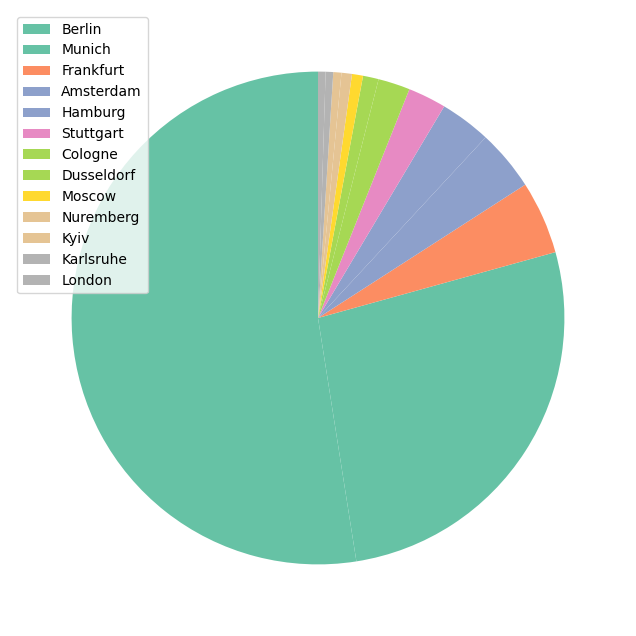

In [112]:
# draw chart to display precentage for each city in the data 
# Top 13 City on the survey 
plt.figure(figsize=(8,8))
df_cleaned['City'].value_counts().iloc[:13].plot.pie(autopct='',fontsize=9,startangle=90,labels=['']*13,cmap='Set2')
plt.ylabel("")
plt.legend(loc='upper left',labels=df_cleaned['City'].value_counts().iloc[:13].index)
plt.show()

#### _`Interpretations:`_
-  `it seems that the most frequent city is Berlin then the cities frequency is ordered as follow Berlin,Munich,Frankfurt,Hamburg,Amsterdam,Stuttgart,Cologne,dusseldrof`
-  `Matched`

In [73]:
######################## POSITION ANALYSIS  #######################

-  `Expectations : The most frequent positions will be Software positions (Front end , backend)  `

In [114]:
# cleam position 
df_cleaned=clean_positions(df_cleaned)

junior it manager   [('product manager', 62), ('security engineer', 53), ('data engineer', 45), ('software engineer', 41), ('ml engineer', 40)]
ratios {'product manager': 62, 'security engineer': 53, 'data engineer': 40, 'software engineer': 41, 'ml engineer': 36}
--------------------------------------
full stack developer    [('fullstack developer', 97), ('ios developer', 86), ('backend developer', 70), ('mobile developer', 68), ('software developer', 68)]
ratios {'fullstack developer': 95, 'ios developer': 65, 'backend developer': 68, 'mobile developer': 59, 'software developer': 67}
--------------------------------------
it project manager   [('product manager', 79), ('software engineer', 46), ('security engineer', 46), ('data engineer', 45), ('ml engineer', 41)]
ratios {'product manager': 79, 'software engineer': 46, 'security engineer': 46, 'data engineer': 45, 'ml engineer': 41}
--------------------------------------
fullstack developer   [('fullstack developer', 100), ('ios deve

In [115]:
df_cleaned['Position'].value_counts()

Position
backend developer      549
software engineer      488
Other                  415
ai engineer            395
frontend developer     173
qa engineer            149
mobile developer       140
devops                 138
fullstack developer     83
product manager         65
designer (ui/ux)        18
researcher              11
security engineer        5
Name: count, dtype: int64

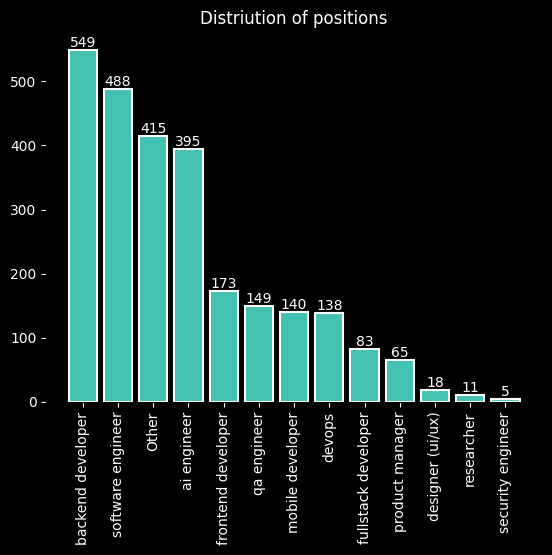

In [116]:
######################################### Draw histogram for positions in the dataset ############################
import matplotlib.pyplot as plt
plot_single_histogram(df_cleaned,'Position','Distriution of positions')

#### _`Interpretations:`_
-  `it seems that the most frequent position is backend developer and software engineer and  and ai engineer`
-  `Expectations Matched`

In [117]:
# We will select Berlin only 
df_cleaned_Berlin = df_cleaned[df_cleaned['City']== "Berlin"]
value_counts =df_cleaned_Berlin['Position'].value_counts()
mask = df_cleaned_Berlin['Position'].isin(value_counts.index[value_counts < 10])
df_cleaned_Berlin = df_cleaned_Berlin.loc[~mask]

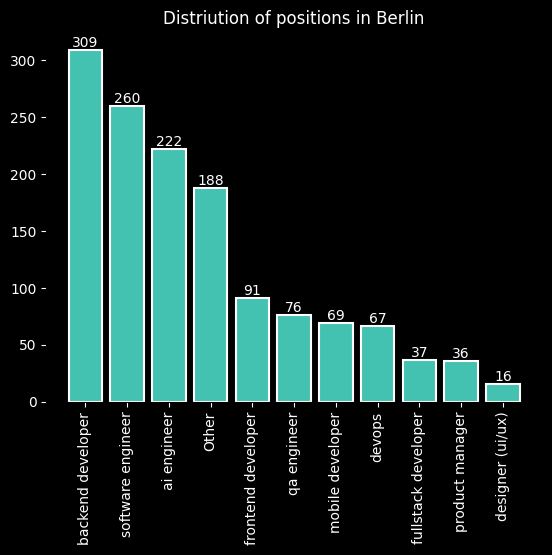

In [118]:
import matplotlib.pyplot as plt
plot_single_histogram(df_cleaned_Berlin,'Position','Distriution of positions in Berlin')

In [79]:
############################### SENIORITY LEVEL ANALYSIS #################################

In [120]:
# check unique values
df_cleaned_Berlin['Seniority level'].unique()


array(['Senior', 'Lead', 'Junior', 'Middle', 'Head', 'No level', 'VP',
       'CTO', 'Director', 'Key', 'Principal', 'intern', 'C-Level',
       'Working Student'], dtype=object)

In [121]:
df_cleaned_Berlin = clean_senior_col(df_cleaned_Berlin)
seniority_remain_values = df_cleaned_Berlin['Seniority level'].value_counts()

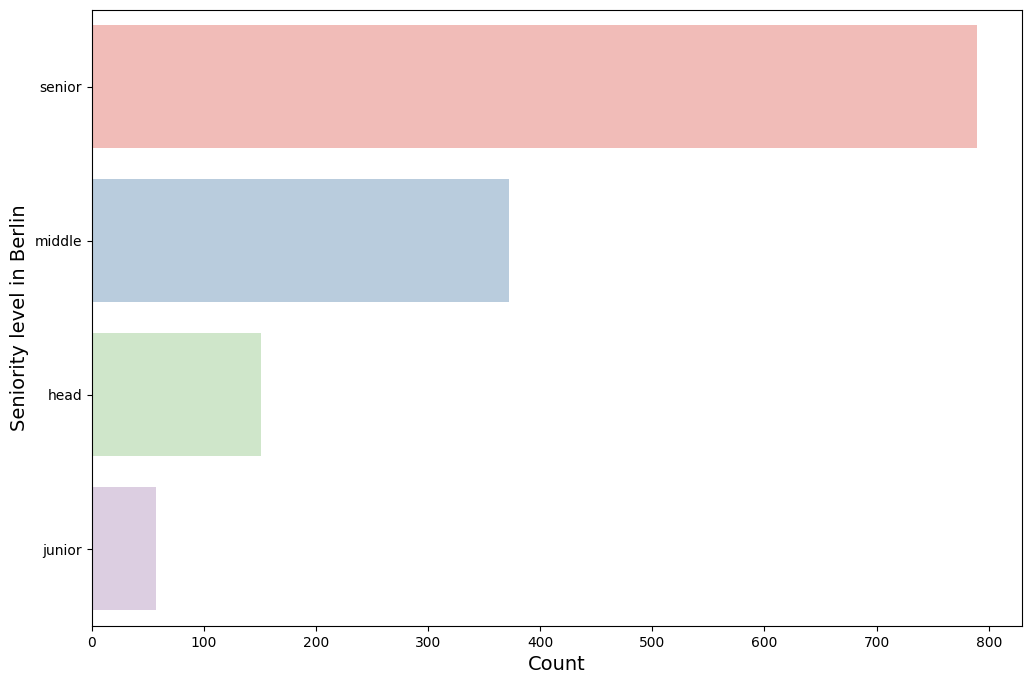

In [122]:
plt.figure(figsize=(12,8))
sns.barplot(y=seniority_remain_values.index,x= seniority_remain_values,palette='Pastel1')
plt.xlabel("Count",fontsize=14)
plt.ylabel("Seniority level in Berlin",fontsize=14)
plt.show()

#### _`Interpretations:`_
-  `From the graph it seems that the most frequent seniority level in the data is senior level , so we can have a strong insights from this level to solve the question and then check other seniority levels so we can support our analysis`
-  `we can also merge senior level with middle level as these two seniority levels are close to each other and the Salaries of then are also closed`

In [84]:
############################### SALARY ANALYSIS ##########################################

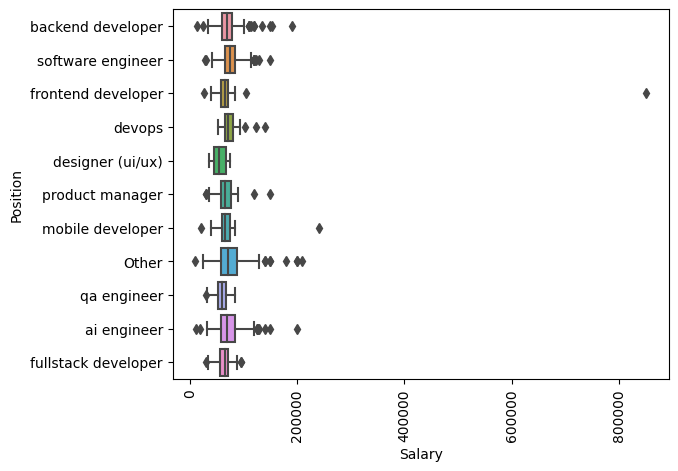

In [123]:
df_cleaned_Berlin['Salary'] = pd.to_numeric(df_cleaned_Berlin['Salary'])
sns.boxplot(x='Salary', y='Position', data=df_cleaned_Berlin)
plt.xticks(rotation=90)
plt.show()

#### _`Interpretations:`_
-  `From this blot box it's obvios that we have outliers in the Salaries , this outliers may affect the mean of the the Salary for each position so i will try to remove them first `

In [124]:
df_cleaned_Berlin = remove_outliers(df_cleaned_Berlin,'Salary')

In [125]:
# analysis for seniors and middle
df_cleaned_Berlin_senior = df_cleaned_Berlin.copy()
df_cleaned_Berlin_senior = df_cleaned_Berlin_senior[df_cleaned_Berlin_senior['Seniority level'].isin(['senior','middle'])]
# remove position count < 7 for better analysis 
position_counts = df_cleaned_Berlin_senior['Position'].value_counts()
position_counts = position_counts[position_counts >= 10]
df_cleaned_Berlin_senior = df_cleaned_Berlin_senior[df_cleaned_Berlin_senior['Position'].isin(position_counts.index)]


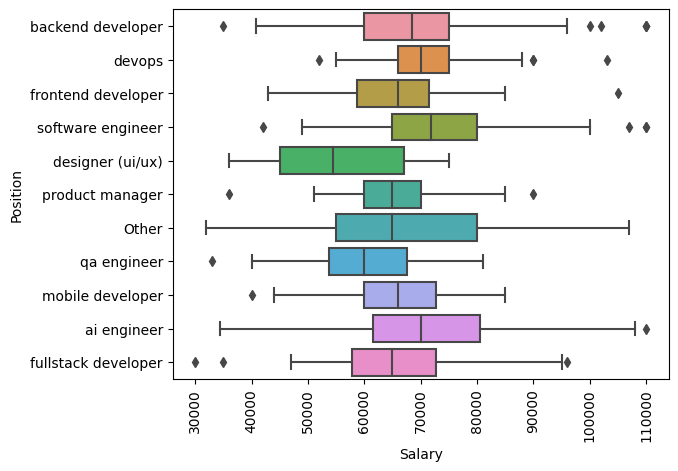

In [126]:
sns.boxplot(x='Salary', y='Position', data=df_cleaned_Berlin_senior)
plt.xticks(rotation=90)
plt.show()

In [127]:
######################## GET AVG SALARIES IN BERLIN  #######################
position_salary = df_cleaned_Berlin_senior.groupby('Position')['Salary'].sum()
position_salary.sort_values(ascending=False,inplace=True)
position_avg_salary = (position_salary/ df_cleaned_Berlin_senior['Position'].value_counts()).sort_values(ascending = False)
top_position = position_avg_salary.index.to_list()
print(position_avg_salary)

Position
software engineer      72811.167513
ai engineer            71848.548571
devops                 71451.578947
backend developer      69198.840426
Other                  67745.864662
mobile developer       67140.322581
frontend developer     65773.481013
fullstack developer    65585.333333
product manager        64790.000000
qa engineer            59925.352113
designer (ui/ux)       55962.500000
dtype: float64


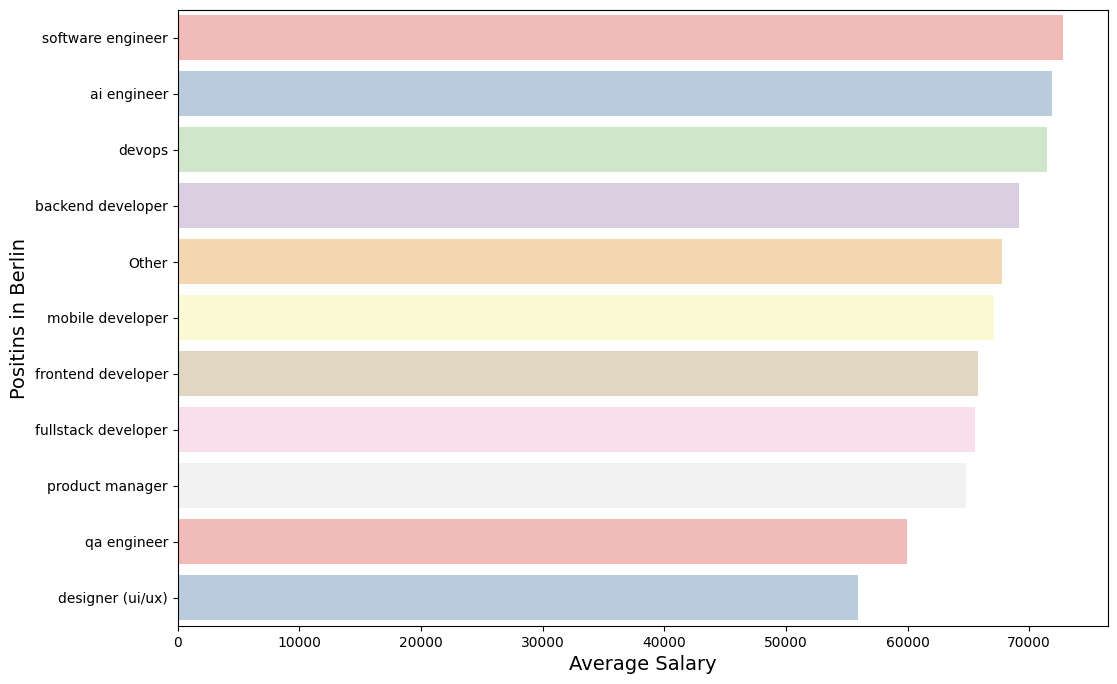

In [90]:
######################## Plot #######################
plt.figure(figsize=(12,8))
sns.barplot(y=top_position,x= position_avg_salary,palette='Pastel1')
plt.xlabel("Average Salary",fontsize=14)
plt.ylabel("Positins in Berlin",fontsize=14)
plt.show()

#### _`Interpretations:`_
1. `From the previous visualizations` I found that the top four position's salaries in Berlin is for four positions 
--------------------------------------------------
| position | avg_salary |
| -------- | -------- | 
|software engineer   |   72811.167513|
|ai engineer         |   71848.548571|
|devops              |   71451.578947|
|backend developer   |   69198.840426|
--------------------------------------------------

2. `Expectation: `
    - high positions in ai engineering and software engineer  (senior & middle) have higher salaries 
3. `Results Interpretation:`
    - From the analysis we find that the highiest salary go for software engineer and with a very small diffrence from the ai engineer so Expectation `Matched`
4. `Additional insights:`
    - Back end and mobile developer are almost the same 
    - Front end and full stack are almost the same 
    - previous Four positions is very close to each other in Salary 
    - QA and Designer are the lowest salaries 



In [128]:
# get for juniors only 

In [129]:
# analysis for juniors  only 
df_cleaned_Berlin_junior = df_cleaned_Berlin.copy()
df_cleaned_Berlin_junior = df_cleaned_Berlin_junior[df_cleaned_Berlin_junior['Seniority level'] =='junior']
# remove position count < 7 for better analysis 
position_counts = df_cleaned_Berlin_junior['Position'].value_counts()
position_counts = position_counts[position_counts >= 5]
df_cleaned_Berlin_junior = df_cleaned_Berlin_junior[df_cleaned_Berlin_junior['Position'].isin(position_counts.index)]

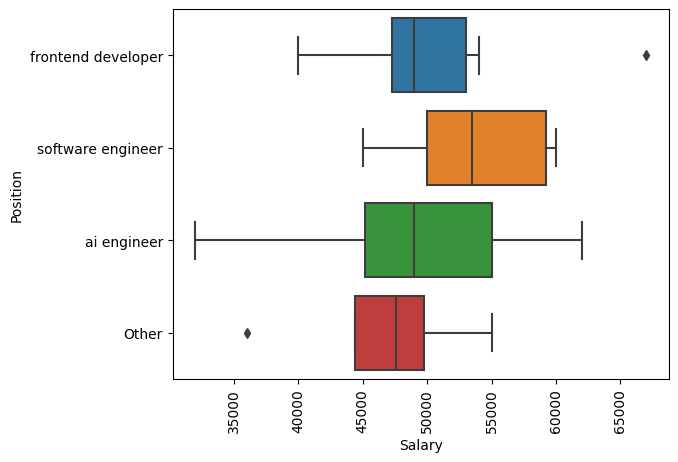

In [130]:
df_cleaned_Berlin_junior['Salary'] = pd.to_numeric(df_cleaned_Berlin_junior['Salary'])
df_cleaned_Berlin_junior = remove_outliers(df_cleaned_Berlin_junior,'Salary')
sns.boxplot(x='Salary', y='Position', data=df_cleaned_Berlin_junior)
plt.xticks(rotation=90)
plt.show()

In [131]:
######################## GET AVG SALARIES IN BERLIN  #######################
position_salary = df_cleaned_Berlin_junior.groupby('Position')['Salary'].sum()
position_salary.sort_values(ascending=False,inplace=True)
position_avg_salary = (position_salary/ df_cleaned_Berlin_junior['Position'].value_counts()).sort_values(ascending = False)
top_position = position_avg_salary.index.to_list()
print(position_avg_salary)

Position
software engineer     53666.666667
frontend developer    51000.000000
ai engineer           49322.727273
Other                 46562.500000
dtype: float64


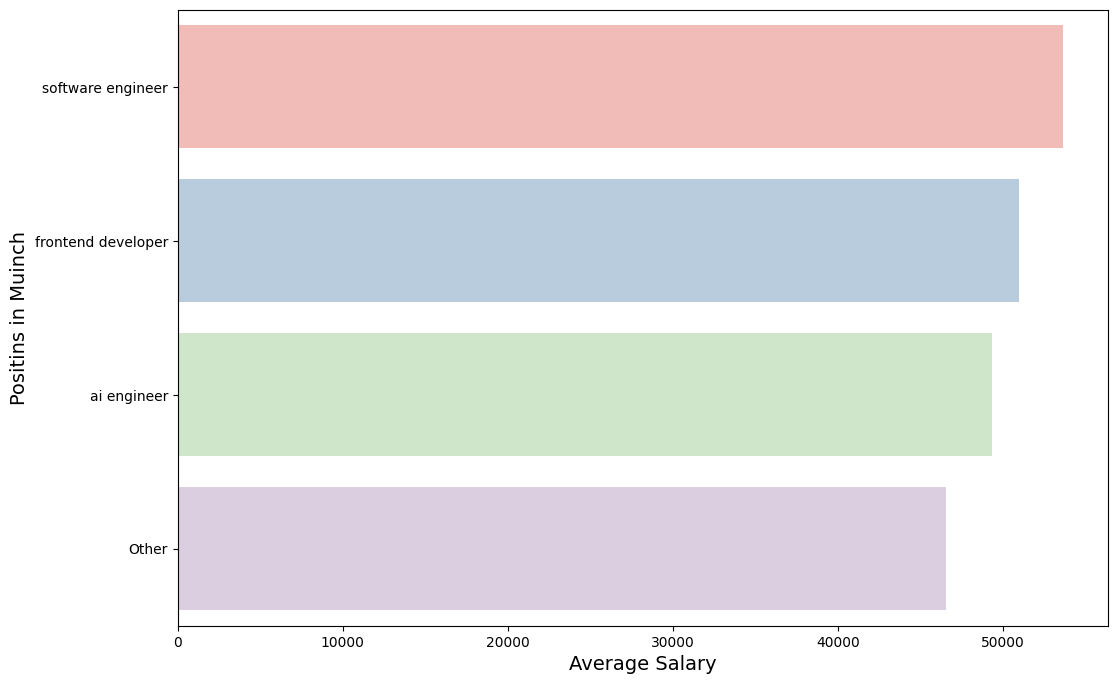

In [132]:
######################## Plot #######################
plt.figure(figsize=(12,8))
sns.barplot(y=top_position,x= position_avg_salary,palette='Pastel1')
plt.xlabel("Average Salary",fontsize=14)
plt.ylabel("Positins in Muinch",fontsize=14)
plt.show()

#### _`Interpretations:`_
1. `From the previous visualizations` I found that the heighst average salary in Berlin FOR Junior POSITIONS is for three positions 
with this order
--------------------------------------------------
| position | avg_salary |
| -------- | -------- | 
|software engineer   |  53666.666667|
|frontend developer  |  51000.000000|
--------------------------------------------------

2. `Expectation: sofware engineers and front end developer need juniors (people that can work with a little experiences ) so I expect that they wiil have the highest salaries in Berlin for juniors`
3. `Matched`

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Interpret Results</h1></div>

#### `Done during analysis `
#### `Question's Answer :` Software Engineer followed by ai Engineer but the highest is Software Engineer